<a href="https://colab.research.google.com/github/Manikanta-Munnangi/CROP---Plant-Disease-Identification-Using-App/blob/master/Cnn-Code/Crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Mounting Dataset From Drive.` 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# `1.Import Libraries.`

In [3]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf 
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# `2.Load Data into Train and Test Variables.`

In [4]:
# My data is in google drive.
train_dir ="drive/My Drive/train_set/"
test_dir="drive/My Drive/test_data/"

# `3.Function To count Images In Each Data Set.`

In [5]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [6]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

10 Classes
12820 Train images
3202 Test images


In [7]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 12820 images belonging to 10 classes.
Found 3201 images belonging to 10 classes.


In [9]:
# The name of the 12 diseases.
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

# `4.CNN Parameter Building.`

In [10]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [11]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


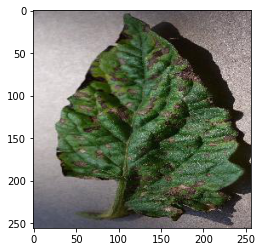

In [12]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/train_set/Tomato_Early_blight/TomatoEarlyblight.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/My Drive/train_set/Tomato_Early_blight/TomatoEarlyblight.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [13]:

# Visualizing output after every layer.
from keras.models import Model
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_features = flatten_output.predict(img)

# `5.Visualizing The Image After Every Layer.`

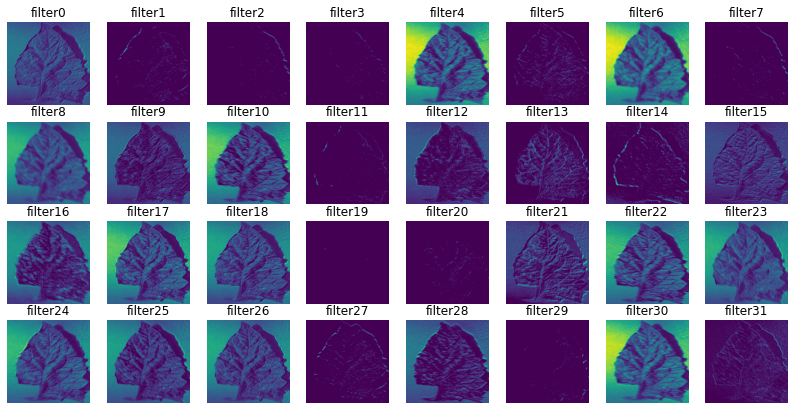

In [14]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

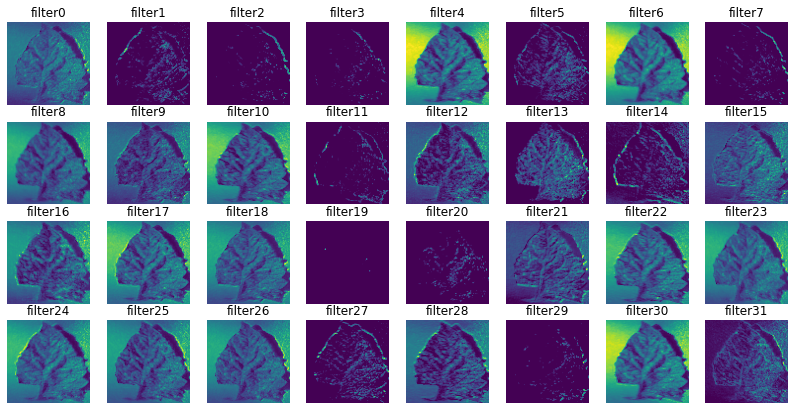

In [15]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

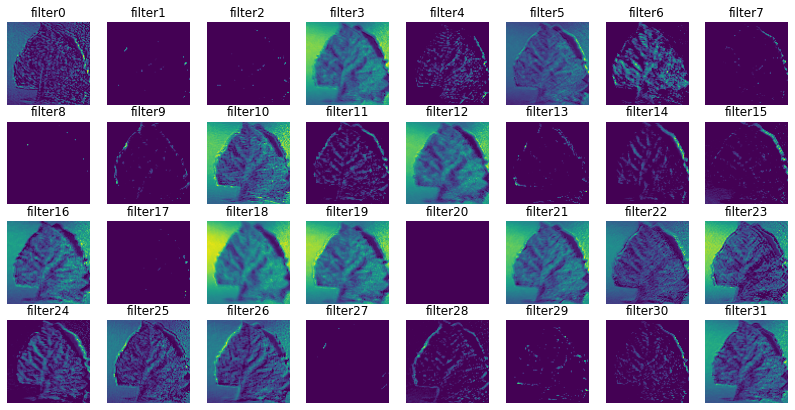

In [16]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

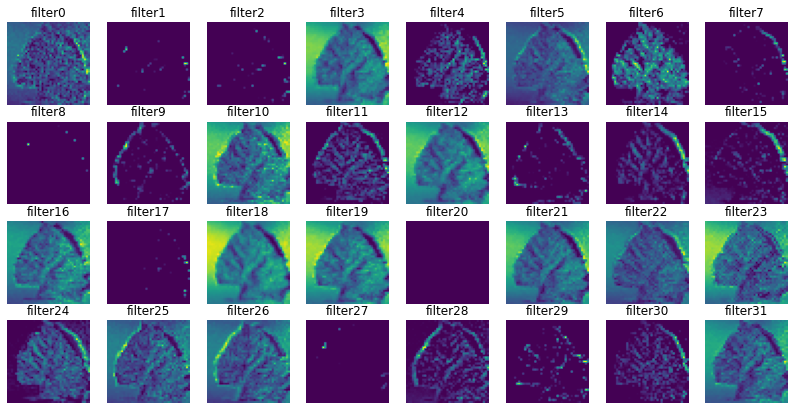

In [17]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

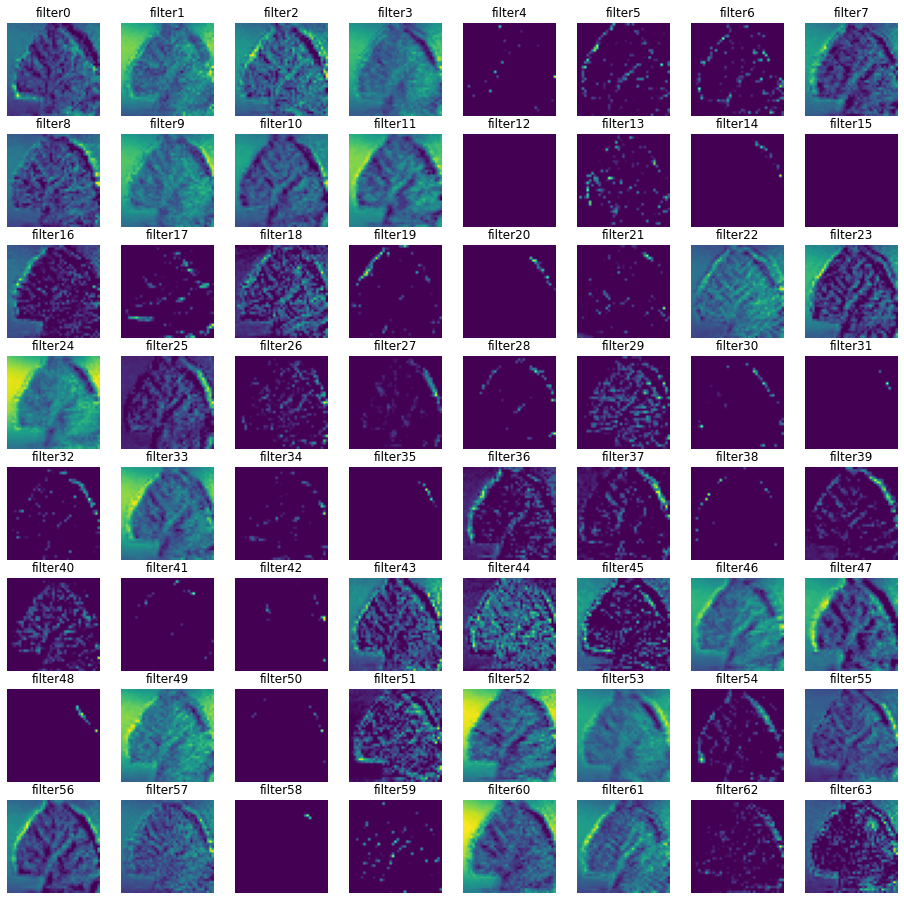

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

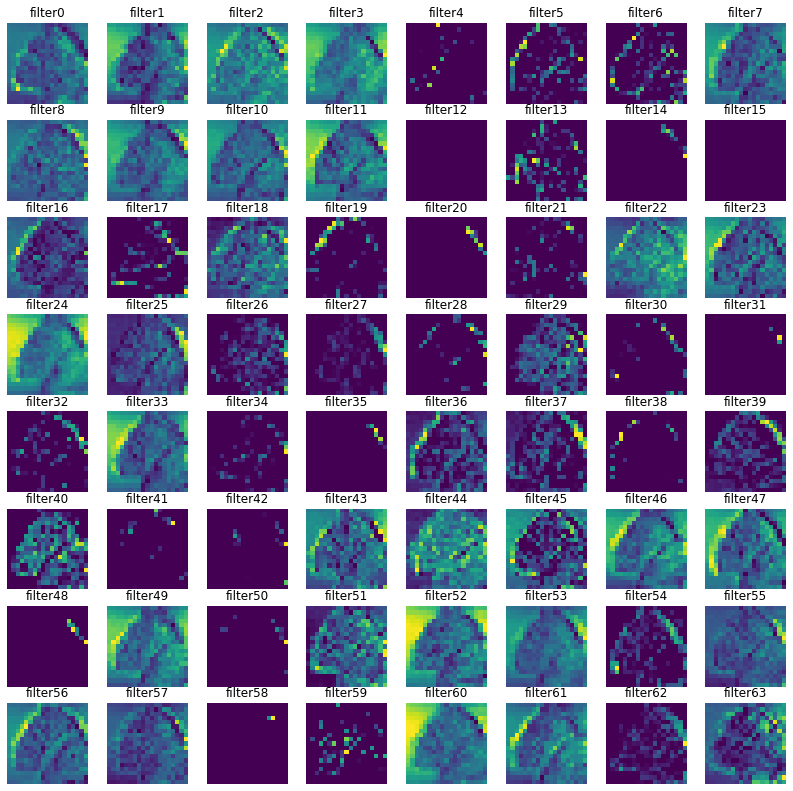

In [19]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i],cmap='viridis')
plt.show()

# `6.Training The Model.`

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

In [24]:
# Model building to get trained with parameters.
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                      
                          epochs=15,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)


400/400 [==============================] - 1473s 4s/step - loss: 1.4787 - accuracy: 0.4870 - val_loss: 1.2457 - val_accuracy: 0.5691
Epoch 3/15
400/400 [==============================] - 1490s 4s/step - loss: 1.2241 - accuracy: 0.5763 - val_loss: 1.0654 - val_accuracy: 0.6364
Epoch 4/15
400/400 [==============================] - 1471s 4s/step - loss: 1.0944 - accuracy: 0.6253 - val_loss: 1.0138 - val_accuracy: 0.6459
Epoch 5/15
400/400 [==============================] - 1459s 4s/step - loss: 1.0429 - accuracy: 0.6444 - val_loss: 0.9763 - val_accuracy: 0.6584
Epoch 6/15
400/400 [==============================] - 1458s 4s/step - loss: 0.9853 - accuracy: 0.6612 - val_loss: 0.9343 - val_accuracy: 0.6790
Epoch 7/15
400/400 [==============================] - 1452s 4s/step - loss: 0.9529 - accuracy: 0.6704 - val_loss: 0.9786 - val_accuracy: 0.6609
Epoch 8/15
400/400 [==============================] - 1517s 4s/step - loss: 0.9144 - accuracy: 0.6861 - val_loss: 0.8339 - val_accuracy: 0.7138
Epo

# `7.Plot For Accuracy And Losses.`

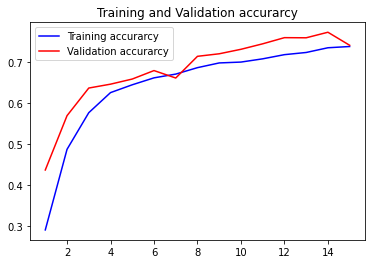

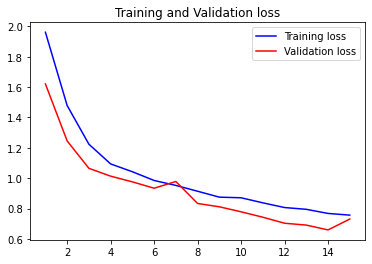

In [30]:
accuracy = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# `8. Evaluate model using unseen data.`


In [31]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

101/101 [==============================] - 833s 8s/step - loss: 0.7878 - accuracy: 0.7238
Test score is 0.7877618670463562
Test accuracy is 0.7238363027572632


# `9.Saving Model.` 

In [32]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [33]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [34]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes


{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

# `10.Load Model.`

In [35]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy"]


# `11.Time For Predictions.`

Tomato___Septoria_leaf_spot


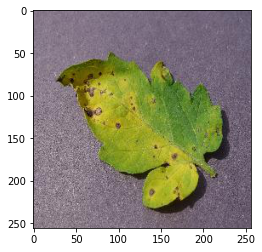

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/My Drive/test_data/Tomato_Septoria_leaf_spot/septorial_leaf(1).JPG')])
disease=image.load_img('/content/drive/My Drive/test_data/Tomato_Septoria_leaf_spot/septorial_leaf(1).JPG')
plt.imshow(disease)
y=np.argmax(result,axis=1)
print (Classes[int(y+3)])
#print (Classes[int(result)])

# `12.Convert Model To "tflite format."`.
- This conversion is done because to make our model interpertable with App.
- tflite is tensorflowlite made for mobile versions.

In [53]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('crop.h5') 
tfmodel = converter.convert() 
open ("output.tflite" , "wb") .write(tfmodel)

AttributeError: ignored